In [1]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_feat = joblib.load('df_feat_med.pkl')
# df_feat = joblib.load('df_feat_trick.pkl')

In [3]:
sign_cols = [it for it in df_feat.columns if re.search('_stat_rol_sub', it) or it in ['Fighter', 'Opponent', 'Date', 'Result'] ]
X = df_feat[sign_cols]

X_tr = X[X['Date']<pd.Timestamp('2021-09-01')].drop(['Fighter', 'Opponent', 'Date', 'Result'], axis=1)
X_ts = X[X['Date']>=pd.Timestamp('2021-09-01')].drop(['Fighter', 'Opponent', 'Date', 'Result'], axis=1)

# after first look at significant cols and bad res on test
# X_tr = X.loc[X['Date']<pd.Timestamp('2021-09-01'), ['wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub', 'sig_str_stat_rol_sub']]
# X_ts = X.loc[X['Date']>=pd.Timestamp('2021-09-01'), ['wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub', 'sig_str_stat_rol_sub']]

# sig_str_stat_rol_sub plays strange role => nothing changed
# X_tr = X.loc[X['Date']<pd.Timestamp('2021-09-01'), ['wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub']]
# X_ts = X.loc[X['Date']>=pd.Timestamp('2021-09-01'), ['wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub']]

# only most correlated use not best results
# X_tr = X.loc[X['Date']<pd.Timestamp('2021-09-01'), ['win_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub']]
# X_ts = X.loc[X['Date']>=pd.Timestamp('2021-09-01'), ['win_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub']]


feat_cols = X_ts.columns
y_tr = X.loc[X['Date']<pd.Timestamp('2021-09-01'), 'Result']
y_ts = X.loc[X['Date']>=pd.Timestamp('2021-09-01'), 'Result']

In [4]:
# PolyFeatures making
# doesn't help
# pca = PolynomialFeatures(2, interaction_only=True)
# X_tr = pca.fit_transform(X_tr)
# X_ts = pca.transform(X_ts)

# pca.get_feature_names_out()

In [5]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_ts = sc.transform(X_ts)

In [6]:
clf = LogisticRegression(random_state=0)
# clf = LogisticRegressionCV(cv=2, random_state=0)
clf.fit(X_tr, y_tr)
y_p = clf.predict(X_ts)
y_proba = clf.predict_proba(X_ts)[:,1]

In [7]:
print(classification_report(y_ts, y_p)),print(classification_report(y_tr, clf.predict(X_tr)))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        48
           1       0.58      0.58      0.58        48

    accuracy                           0.58        96
   macro avg       0.58      0.58      0.58        96
weighted avg       0.58      0.58      0.58        96

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      2464
           1       0.58      0.58      0.58      2464

    accuracy                           0.58      4928
   macro avg       0.58      0.58      0.58      4928
weighted avg       0.58      0.58      0.58      4928



(None, None)

# Try increase accuracy

In [167]:
df_comp = X.loc[X['Date']>=pd.Timestamp('2021-09-01'), ['Fighter','Opponent', 'Result','Date']]
df_comp['y_ts'] = y_ts
df_comp['y_p'] = y_p
df_comp['y_proba'] = y_proba
df_comp

,Fighter,Opponent,Result,Date,y_ts,y_p,y_proba
53,Alejandro Perez,Johnny Eduardo,1,2021-10-02,1,1,0.541845
86,Alex Caceres,SeungWoo Choi,1,2021-10-23,1,0,0.457936
100,Alex Morono,David Zawada,1,2021-09-04,1,1,0.661706
114,Alex Oliveira,Niko Price,0,2021-10-02,0,0,0.475599
150,Alexander Volkanovski,Brian Ortega,1,2021-09-25,1,1,0.545290
158,Alexander Volkov,Marcin Tybura,1,2021-10-30,1,0,0.499916
221,Amanda Ribas,Virna Jandiroba,1,2021-10-30,1,1,0.574893
292,Andrei Arlovski,Carlos Felipe,1,2021-10-16,1,0,0.480225
297,Andrew Sanchez,Bruno Silva,0,2021-10-16,0,1,0.523822
371,Anthony Smith,Ryan Spann,1,2021-09-18,1,1,0.502447


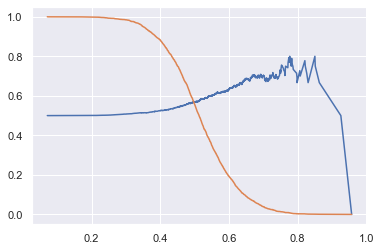

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

X_all = sc.transform(X.drop(['Fighter', 'Opponent', 'Date', 'Result'], axis=1))
y_all = X['Result']
probas = cross_val_predict(clf, X_all, y_all, method='predict_proba')[:,1]

pres, recs, treshs =  precision_recall_curve(y_all, probas)

plt.plot(treshs,pres[:-1] )
plt.plot(treshs,recs[:-1] )

In [10]:
lev = 0.7
idx = np.where(pres>lev)[0]
recs[idx][0]

0.07046178343949044

In [11]:
clf.fit(X_all, y_all)

LogisticRegression(random_state=0)

# Predict

In [12]:
df_pred = pd.read_csv('ufc_datalens.csv')
df_coefs = pd.read_excel('coefs_ufc268.xlsx')

In [13]:
f_d = {'Карлос Вергара':'CJ Vergara','Оде Осборн':'Ode Osbourne', 'Бобби Грин':'Bobby Green', 'Аль Яквинта':'Al Iaquinta',
       'Мелсик Багдасарян':'Melsik Baghdasaryan','Бруно Соуза':'Bruno Souza', 'Дастин Джакоби':'Dustin Jacoby',
       'Джон Аллан Арте':'John Allan','Джан Вилланте':'Gian Villante','Крис Барнетт':'Chris Barnett',
       'Иан Гарри':'Ian Garry','Джордан Уильямс':'Jordan Williams','Эдмен Шахбазян':'Edmen Shahbazyan','Нассурдин Имавов':'Nassourdine Imavov',
        'Фил Хоус':'Phil Hawes','Крис Кертис':'Chris Curtis','Алекс Перейра':'Alex Pereira','Андреас Михайлидис':'Andreas Michailidis',
       'Джастин Гейджи':'Justin Gaethje','Майкл Чендлер':'Michael Chandler','Шэйн Бургос':'Shane Burgos','Билли Куарантилло':'Billy Quarantillo',
        'Фрэнки Эдгар':'Frankie Edgar','Марлон Вера':'Marlon Vera','Роуз Намаюнас':'Rose Namajunas','Чжан Вэйли':'Zhang Weili','Камару Усман':'Kamaru Usman',
                    'Колби Ковингтон':'Colby Covington'
      }

In [14]:
df_coefs['fighter1'] = df_coefs['fighter1'].map(f_d)
df_coefs['fighter2'] = df_coefs['fighter2'].map(f_d)

In [15]:
fighter_last_date = df_pred.groupby(['Fighter'], as_index=False)['Date'].max()
df_pred = df_pred.merge(fighter_last_date, on = ['Fighter', 'Date'])
df_pred

,Event,Fighter,Opponent,Result,Method:,Round:,Time:,Time format:,Referee:,Details:,...,ctrl_dam_stat_rol,win_stat_rol,lose_stat_rol,wrest_w_stat_rol,wrest_l_stat_rol,KO_w_stat_rol,KO_l_stat_rol,dec_w_stat_rol,dec_l_stat_rol,nlosses_stat_rol
0,UFC 259: Blachowicz vs. Adesanya,Aalon Cruz,Uros Medic,L,KO/TKO,1,1:40,3 Rnd (5-5-5),Mark Smith,Punches to Head On Ground,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UFC 28: High Stakes,Aaron Brink,Andrei Arlovski,L,Submission,1,0:55,3 Rnd (5-5-5),John McCarthy,Armbar On Ground,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UFC Fight Night: Kattar vs. Ige,Aaron Phillips,Jack Shore,L,Submission,2,2:29,3 Rnd (5-5-5),Herb Dean,Rear Naked Choke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UFC on FOX: Johnson vs Moraga,Aaron Riley,Justin Salas,L,Decision - Split,3,5:00,3 Rnd (5-5-5),Randy Corley,Sal D'amato_28 - 29.Lamont Nelson_29 - 28.Chri...,...,0.073091,0.375000,0.625000,0.000000,0.0,0.000000,0.500000,0.375000,0.125000,2.0
4,UFC on FX: Alves vs Kampmann,Aaron Rosa,James Te Huna,L,KO/TKO,1,2:08,3 Rnd (5-5-5),Leon Roberts,Punches to Head In Clinch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,UFC Fight Night: Edgar vs Faber,Zhang Lipeng,Kajan Johnson,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Greg Kleynjans,Mark Craig_27 - 30.Barry Foley_28 - 29.Kon Pap...,...,0.432593,0.666667,0.333333,0.000000,0.0,0.000000,0.000000,0.666667,0.333333,1.0
2223,UFC Macao: Franklin vs Le,Zhang Tiequan,Jon Tuck,L,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Marc Goddard,Mark Collett_28 - 29.Bass Singh_27 - 30.Thomas...,...,0.384508,0.333333,0.666667,0.333333,0.0,0.000000,0.333333,0.000000,0.333333,2.0
2224,UFC 261: Usman vs. Masvidal 2,Zhang Weili,Rose Namajunas,L,KO/TKO,1,1:18,5 Rnd (5-5-5-5-5),Keith Peterson,Kick to Head At Distance,...,0.089455,1.000000,0.000000,0.200000,0.0,0.200000,0.000000,0.600000,0.000000,0.0
2225,UFC 267: Blachowicz vs. Teixeira,Zubaira Tukhugov,Ricardo Ramos,W,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Marc Goddard,David Lethaby:28 - 29.Vito Paolillo:28 - 29.Da...,...,0.094444,0.571429,0.285714,0.000000,0.0,0.285714,0.000000,0.285714,0.285714,1.0


In [16]:
new_fights = pd.read_csv('items.csv')

new_fights['Date'] = pd.to_datetime(new_fights['Date'], format='%Y-%m-%d')
new_fights = new_fights[new_fights['Date']==new_fights['Date'].max()]

In [50]:
df1 = new_fights[['Fighter_left']].merge(df_pred, left_on = 'Fighter_left', right_on = 'Fighter', how='left').drop('Fighter_left', axis=1)
df2 = new_fights[['Fighter_right']].merge(df_pred, left_on = 'Fighter_right', right_on = 'Fighter', how='left' ).drop('Fighter_right', axis=1)

In [63]:
feat_cols = [it for it in df_pred.columns if re.search('_stat_rol', it)]
df = df1[['Fighter']+feat_cols].rename(columns={'Fighter':'Fighter_left'})
df[feat_cols] = df[feat_cols] - df2[feat_cols]
df['Fighter_right'] = df2['Fighter']

In [65]:
df = df[['Fighter_left', 'Fighter_right']+feat_cols]

In [68]:
df = df[df['sig_str_stat_rol'].notnull()]


,Fighter_left,Fighter_right,sig_str_stat_rol,sig_str_dam_stat_rol,sig_str_h_stat_rol,sig_str_h_dam_stat_rol,sig_str_l_stat_rol,sig_str_l_dam_stat_rol,sig_str_b_stat_rol,sig_str_b_dam_stat_rol,...,ctrl_dam_stat_rol,win_stat_rol,lose_stat_rol,wrest_w_stat_rol,wrest_l_stat_rol,KO_w_stat_rol,KO_l_stat_rol,dec_w_stat_rol,dec_l_stat_rol,nlosses_stat_rol
1,Shane Burgos,Billy Quarantillo,-0.102279,0.029008,0.176443,0.209072,0.114005,0.251962,0.056891,0.214071,...,-0.166911,0.000000,0.000000,-0.125000,0.000000,0.000000,0.125000,0.125000,-0.125000,0.0
2,Kamaru Usman,Colby Covington,-0.240000,0.051382,0.033333,-0.055862,0.157970,-0.001301,0.013333,0.226667,...,-0.008572,0.166667,-0.166667,-0.089744,-0.083333,0.064103,-0.083333,0.192308,0.000000,-1.0
4,Rose Namajunas,Zhang Weili,0.047141,-0.038187,-0.238187,0.155724,-0.271520,0.087893,-0.233333,-0.202732,...,0.005301,-0.300000,0.300000,0.100000,0.100000,-0.100000,0.100000,-0.300000,0.100000,1.0
8,Frankie Edgar,Marlon Vera,-0.249561,0.107855,-0.252585,-0.166950,-0.102495,-0.346667,-0.233333,-0.117912,...,-0.234510,0.041667,-0.078704,-0.175926,0.000000,-0.127315,0.074074,0.344907,-0.152778,0.0
9,Al Iaquinta,Bobby Green,0.133333,0.000000,-0.173333,-0.200000,0.025948,-0.133333,0.026667,0.002801,...,-0.022740,0.158974,-0.092308,-0.066667,0.153846,0.241026,-0.066667,-0.015385,-0.179487,1.0


In [72]:
X_pr = df.drop(['Fighter_left', 'Fighter_right'], axis=1)
X_pr = sc.transform(X_pr)
y_pred = clf.predict_proba(X_pr)[:,1]


df['y_pred'] = y_pred

In [78]:
df_coefs = df_coefs.merge(df[['Fighter_left', 'Fighter_right', 'y_pred']], left_on=['fighter1','fighter2'], 
               right_on=['Fighter_left', 'Fighter_right']).drop(['Fighter_left', 'Fighter_right'], axis=1)
money = 1000
df_coefs['each'] = money/df_coefs.shape[0]


In [84]:
df_coefs = new_fights[['Fighter_left','Fighter_right', 'Win_lose_left']].merge(df_coefs, left_on=['Fighter_left','Fighter_right'], 
                                                                               right_on=['fighter1','fighter2'])

In [88]:
df_coefs['Result'] = np.where(df_coefs['Win_lose_left']=='W',1,0)
df_coefs.drop('Win_lose_left', axis=1, inplace=True)

In [89]:
df_coefs

,Fighter_left,Fighter_right,fighter1,fighter2,coef1,coef2,y_pred,each,Result
0,Shane Burgos,Billy Quarantillo,Shane Burgos,Billy Quarantillo,1.48,2.75,0.512065,200.0,1
1,Kamaru Usman,Colby Covington,Kamaru Usman,Colby Covington,1.29,3.75,0.521227,200.0,1
2,Rose Namajunas,Zhang Weili,Rose Namajunas,Zhang Weili,2.00,1.85,0.443441,200.0,1
3,Frankie Edgar,Marlon Vera,Frankie Edgar,Marlon Vera,2.40,1.60,0.606454,200.0,0
4,Al Iaquinta,Bobby Green,Al Iaquinta,Bobby Green,2.52,1.55,0.537191,200.0,0


# Check mistakes

In [10]:
# comp_df = df_feat.loc[df_feat['Date']>=pd.Timestamp('2021-09-01'), ['Fighter', 'Opponent', 'Date', 'Result', 'wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub', ]]
comp_df = df_feat[df_feat['Date']>=pd.Timestamp('2021-09-01')].copy()
comp_df['y_ts'] = y_ts
comp_df['y_p'] = y_p
comp_df['y_proba'] = y_proba

In [12]:
pd.options.display.max_rows=100
df_all = joblib.load('df_all.pkl')
comp_df = comp_df.merge(df_all[['Fighter', 'Opponent', 'Date', 'method_type']], on = ['Fighter', 'Opponent', 'Date'] )

comp_df[(comp_df['y_ts']!=comp_df['y_p'])&(abs(y_proba-0.5)>0.15)]

comp_df[(abs(y_proba-0.5)>0.15)]

,Event,Fighter,Opponent,Result,Method:,Round:,Time:,Time format:,Referee:,Details:,...,wrest_w_stat_rol_sub,wrest_l_stat_rol_sub,KO_w_stat_rol_sub,KO_l_stat_rol_sub,dec_w_stat_rol_sub,dec_l_stat_rol_sub,y_ts,y_p,y_proba,method_type_y
2,UFC Fight Night: Brunson vs. Till,Alex Morono,David Zawada,1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Jason Herzog,Derek Cleary:27 - 30.Sal D'amato:27 - 30.Bryan...,...,-0.173077,0.000000,0.153846,-0.173077,0.384615,-0.269231,1,1,0.661967,decision
12,UFC Fight Night: Santos vs. Walker,Bethe Correia,Karol Rosa,0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,Sal D'amato:27 - 30.Adalaide Byrd:27 - 30.Chri...,...,0.000000,0.090909,0.090909,0.181818,-0.636364,0.181818,0,0,0.311447,decision
18,UFC 266: Volkanovski vs. Ortega,Chris Daukaus,Shamil Abdurakhimov,1,KO/TKO,2,1:23,3 Rnd (5-5-5),Mark Smith,Punch to Head At Distance,...,0.000000,0.000000,0.750000,-0.375000,-0.375000,0.000000,1,1,0.749560,KO/TKO
28,UFC Fight Night: Ladd vs. Dumont,Danny Roberts,Ramazan Emeev,1,Decision - Split,3,5:00,3 Rnd (5-5-5),Mark Smith,Rick Winter:28 - 29.Sal D'amato:29 - 28.Chris ...,...,0.100000,0.100000,0.300000,0.300000,-0.633333,-0.166667,1,0,0.349730,decision
30,UFC Fight Night: Brunson vs. Till,David Zawada,Alex Morono,0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Jason Herzog,Derek Cleary:27 - 30.Sal D'amato:27 - 30.Bryan...,...,0.173077,0.000000,-0.153846,0.173077,-0.384615,0.269231,0,0,0.338033,decision
51,UFC Fight Night: Santos vs. Walker,Karol Rosa,Bethe Correia,1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,Sal D'amato:27 - 30.Adalaide Byrd:27 - 30.Chri...,...,0.000000,-0.090909,-0.090909,-0.181818,0.636364,-0.181818,1,1,0.688553,decision
53,UFC 267: Blachowicz vs. Teixeira,Khamzat Chimaev,Li Jingliang,1,Submission,1,3:16,3 Rnd (5-5-5),Jason Herzog,Rear Naked Choke,...,0.333333,-0.071429,0.166667,0.000000,-0.214286,-0.214286,1,1,0.719981,wrestling
57,UFC 267: Blachowicz vs. Teixeira,Li Jingliang,Khamzat Chimaev,0,Submission,1,3:16,3 Rnd (5-5-5),Jason Herzog,Rear Naked Choke,...,-0.333333,0.071429,-0.166667,0.000000,0.214286,0.214286,0,0,0.280019,wrestling
60,UFC 267: Blachowicz vs. Teixeira,Magomed Ankalaev,Volkan Oezdemir,1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Marc Goddard,Darryl Ransom:27 - 30.Clemens Werner:27 - 30.B...,...,0.000000,0.031746,0.238095,-0.222222,0.063492,-0.111111,1,1,0.679112,decision
78,UFC Fight Night: Ladd vs. Dumont,Ramazan Emeev,Danny Roberts,0,Decision - Split,3,5:00,3 Rnd (5-5-5),Mark Smith,Rick Winter:28 - 29.Sal D'amato:29 - 28.Chris ...,...,-0.100000,-0.100000,-0.300000,-0.300000,0.633333,0.166667,0,1,0.650270,decision


In [13]:
# comp_df_tr = df_feat.loc[df_feat['Date']<pd.Timestamp('2021-09-01'), ['Fighter', 'Opponent', 'Date', 'Result', 'wrest_w_stat_rol_sub', 'KO_w_stat_rol_sub', 'dec_w_stat_rol_sub',
#        'ctrl_dam_stat_rol_sub', ]]
comp_df_tr = df_feat[df_feat['Date']<pd.Timestamp('2021-09-01')].copy()
comp_df_tr['y_tr'] = y_tr
comp_df_tr['y_p'] = clf.predict(X_tr)
comp_df_tr['y_proba'] = clf.predict_proba(X_tr)[:,1]

In [16]:
# if all feat are used
feat_cols = [it for it in df_feat.columns if re.search('_stat_rol_sub', it) ]

['sig_str_stat_rol_sub',
 'sig_str_dam_stat_rol_sub',
 'sig_str_h_stat_rol_sub',
 'sig_str_h_dam_stat_rol_sub',
 'sig_str_l_stat_rol_sub',
 'sig_str_l_dam_stat_rol_sub',
 'sig_str_b_stat_rol_sub',
 'sig_str_b_dam_stat_rol_sub',
 'sig_str_d_stat_rol_sub',
 'sig_str_d_dam_stat_rol_sub',
 'sig_str_cl_stat_rol_sub',
 'sig_str_cl_dam_stat_rol_sub',
 'sig_str_gr_stat_rol_sub',
 'sig_str_gr_dam_stat_rol_sub',
 'kd_stat_rol_sub',
 'kd_dam_stat_rol_sub',
 'sub_att_stat_rol_sub',
 'sub_att_dam_stat_rol_sub',
 'rev_stat_rol_sub',
 'rev_dam_stat_rol_sub',
 'td_stat_rol_sub',
 'td_dam_stat_rol_sub',
 'ctrl_stat_rol_sub',
 'ctrl_dam_stat_rol_sub',
 'win_stat_rol_sub',
 'lose_stat_rol_sub',
 'wrest_w_stat_rol_sub',
 'wrest_l_stat_rol_sub',
 'KO_w_stat_rol_sub',
 'KO_l_stat_rol_sub',
 'dec_w_stat_rol_sub',
 'dec_l_stat_rol_sub']

# Find similarity in mistakes

In [36]:
X_mis_tr = comp_df_tr.copy()
X_mis_tr.loc[X_mis_tr['y_tr']!=X_mis_tr['y_p'],'target'] = 1
X_mis_tr.loc[X_mis_tr['y_tr']==X_mis_tr['y_p'],'target'] = 0
y_mis_tr = X_mis_tr['target']

# X_mis_tr.drop(['Fighter', 'Opponent', 'Date', 'Result', 'y_tr', 'y_p', 'target'],axis=1, inplace=True)
# X_mis_tr = X_mis_tr[feat_cols+['y_proba']]
X_mis_tr = X_mis_tr[feat_cols]

X_mis_ts = comp_df.copy()
X_mis_ts.loc[X_mis_ts['y_ts']!=X_mis_ts['y_p'],'target'] = 1
X_mis_ts.loc[X_mis_ts['y_ts']==X_mis_ts['y_p'],'target'] = 0
y_mis_ts = X_mis_ts['target']

# X_mis_ts.drop(['Fighter', 'Opponent', 'Date', 'Result', 'y_ts', 'y_p', 'target'],axis=1, inplace=True)
# X_mis_ts = X_mis_ts[feat_cols+['y_proba']]
X_mis_ts = X_mis_ts[feat_cols]

In [45]:
# clf_mis = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
clf_mis = DecisionTreeClassifier(max_depth=3)
# clf_mis = DecisionTreeClassifier()
clf_mis.fit(X_mis_tr,y_mis_tr)
y_mis_tr_pr = clf_mis.predict(X_mis_tr)
y_mis_ts_pr = clf_mis.predict(X_mis_ts)

In [46]:
y_mis_tr.sum()

2072.0

In [47]:
print(classification_report(y_mis_tr, y_mis_tr_pr)), print(classification_report(y_mis_ts, y_mis_ts_pr))

              precision    recall  f1-score   support

         0.0       0.59      0.97      0.73      2856
         1.0       0.58      0.07      0.12      2072

    accuracy                           0.59      4928
   macro avg       0.58      0.52      0.42      4928
weighted avg       0.58      0.59      0.47      4928

              precision    recall  f1-score   support

         0.0       0.63      0.97      0.76        58
         1.0       0.71      0.13      0.22        38

    accuracy                           0.64        96
   macro avg       0.67      0.55      0.49        96
weighted avg       0.66      0.64      0.55        96



(None, None)

<AxesSubplot:>

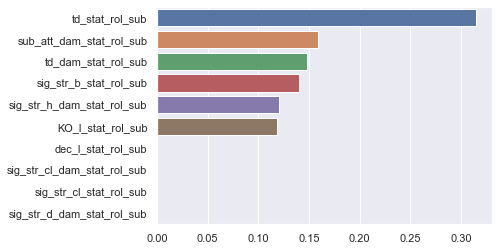

In [99]:
idx = np.argsort(clf_mis.feature_importances_)[::-1]
n=10
# cols = comp_df.drop(['Fighter', 'Opponent', 'Date', 'Result', 'y_ts', 'y_p'],axis=1).columns
# cols = np.array(feat_cols+['y_proba'])
cols = np.array(feat_cols)
sns.barplot(y=cols[idx[:n]], x = clf_mis.feature_importances_[idx[:n]])

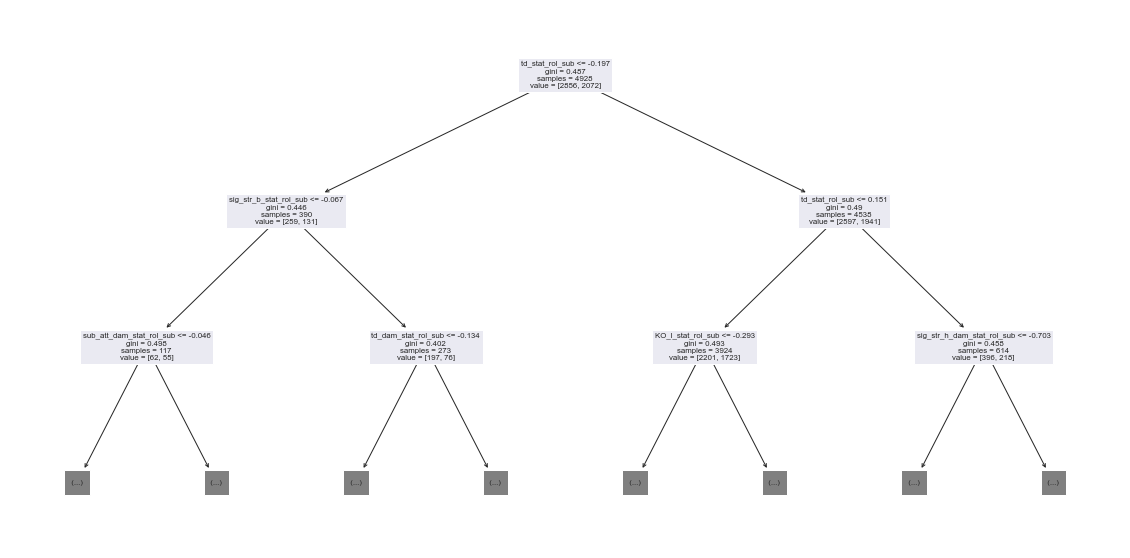

In [49]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf_mis, feature_names = cols, max_depth=2)
plt.show()


# Look at Alg Settings

In [100]:
def draw_learning_curve(estim,x,y,sizes_l, cv=3):
    train_sizes,train_scores, test_scores = learning_curve(estim, x, y, train_sizes=sizes_l,cv=cv,n_jobs=-1)
    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis =1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes,train_mean, color='blue', marker='o', markersize=5, label = 'правильность при обучении')
    plt.fill_between(train_sizes, train_mean+train_std , train_mean - train_std,alpha = 0.2,color='blue')
    plt.plot(train_sizes,test_mean, color='green',marker='s', markersize=5, label='правильность при проверке')
    plt.fill_between(train_sizes, test_mean+test_std, test_mean - test_std, alpha=0.2, color = 'green')
    plt.grid()
    plt.xlabel('количество обучающих образцов')
    plt.ylabel('правильность')
    plt.legend()
    plt.ylim([0.5, 1])
    plt.show()

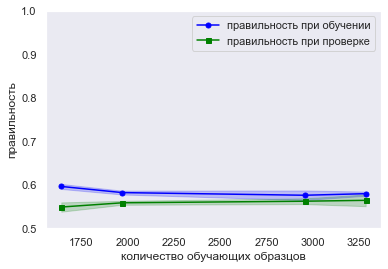

In [101]:
draw_learning_curve(clf, X_tr, y_tr, sizes_l=[0.5,0.6,0.9, 1])

In [102]:
n = 15
idx = np.argsort(np.abs(clf.coef_)[0])[::-1]

C:\tools\Anaconda3\envs\snab\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

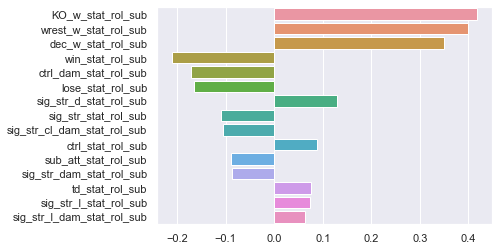

In [103]:
x = feat_cols[idx[:n]]
y = clf.coef_[0][idx[:n]]
sns.barplot(y, x)

In [104]:
feat_cols

Index(['sig_str_stat_rol_sub', 'sig_str_dam_stat_rol_sub',
       'sig_str_h_stat_rol_sub', 'sig_str_h_dam_stat_rol_sub',
       'sig_str_l_stat_rol_sub', 'sig_str_l_dam_stat_rol_sub',
       'sig_str_b_stat_rol_sub', 'sig_str_b_dam_stat_rol_sub',
       'sig_str_d_stat_rol_sub', 'sig_str_d_dam_stat_rol_sub',
       'sig_str_cl_stat_rol_sub', 'sig_str_cl_dam_stat_rol_sub',
       'sig_str_gr_stat_rol_sub', 'sig_str_gr_dam_stat_rol_sub',
       'kd_stat_rol_sub', 'kd_dam_stat_rol_sub', 'sub_att_stat_rol_sub',
       'sub_att_dam_stat_rol_sub', 'rev_stat_rol_sub', 'rev_dam_stat_rol_sub',
       'td_stat_rol_sub', 'td_dam_stat_rol_sub', 'ctrl_stat_rol_sub',
       'ctrl_dam_stat_rol_sub', 'win_stat_rol_sub', 'lose_stat_rol_sub',
       'wrest_w_stat_rol_sub', 'wrest_l_stat_rol_sub', 'KO_w_stat_rol_sub',
       'KO_l_stat_rol_sub', 'dec_w_stat_rol_sub', 'dec_l_stat_rol_sub',
       'nlosses_stat_rol_sub'],
      dtype='object')